In [2]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.insert(0, '../scripts')
from data_preProcessing import dataProcessor
from data_cleaning import dataCleaner
from data_exploration import dataExplorer


In [4]:
store_df = pd.read_csv('../data/store.csv')
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [5]:
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
preP_store = dataProcessor(store_df)
preP_store.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
preP_train = dataProcessor(train_df)
preP_train.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
preP_test = dataProcessor(test_df)
preP_test.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


# Handle missing values

* First list out the columns which have missing values in them, for each set

In [11]:
preP_store.columns_WithMissingValue()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [12]:
preP_train.columns_WithMissingValue()

[]

In [13]:
preP_test.columns_WithMissingValue()

['Open']

### Percentage of missing values

In [14]:
preP_store.c_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


### Fill the above missing values for the store table, using median for competition distance column, and fill the others with zeros 

In [15]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store_df.CompetitionOpenSinceYear.fillna(0, inplace = True)
store_df.Promo2SinceWeek.fillna(0, inplace = True)
store_df.Promo2SinceYear.fillna(0, inplace = True)
store_df.PromoInterval.fillna(0, inplace = True)

In [16]:
preP_store.c_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,0,0.0 %
CompetitionOpenSinceMonth,0,0.0 %
CompetitionOpenSinceYear,0,0.0 %
Promo2,0,0.0 %
Promo2SinceWeek,0,0.0 %
Promo2SinceYear,0,0.0 %
PromoInterval,0,0.0 %


In [17]:
preP_train.c_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [18]:
preP_test.c_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,11,0.03 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


### Fill the 'open' column in the test table with the median value.

In [19]:
test_df['Open'].fillna(test_df['Open'].median(), inplace = True)

In [20]:
preP_test.c_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


# Look at the datatypes

In [22]:
preP_store.show_datatypes()

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [23]:
preP_train.show_datatypes()

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [24]:
preP_test.show_datatypes()

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [25]:
# Change 'date' from object to datetime64 data type in the train and test dataframes

train_df.Date = pd.to_datetime(train_df["Date"])
test_df.Date = pd.to_datetime(test_df["Date"])

In [26]:
preP_train.show_datatypes()

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [27]:
preP_test.show_datatypes()

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [28]:
cl_train_df = dataCleaner(train_df)
cl_test_df = dataCleaner(test_df)
cl_store_df = dataCleaner(store_df)

In [29]:
## Separate the date into year, month and day for the train and test data
cl_train_df.separate_date_column(date_column='Date')
cl_test_df.separate_date_column(date_column='Date')

# OUTLIERS

## Outliers detection and fixing for test data 

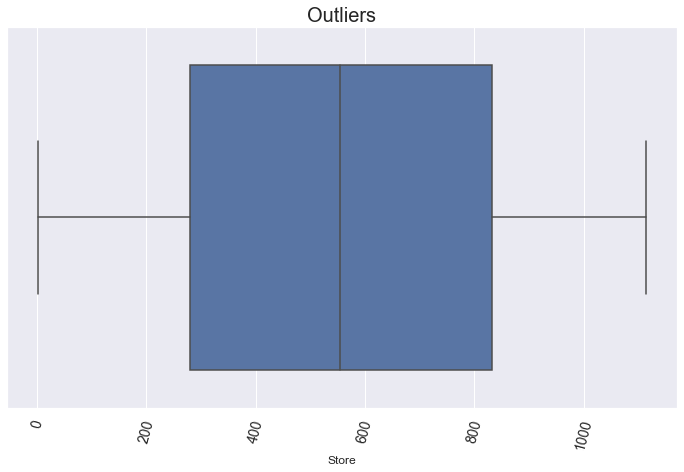

In [30]:
dataExplorer.plot_box(test_df, 'Store', 'Outliers')

## Outliers detection and fixing for train data 

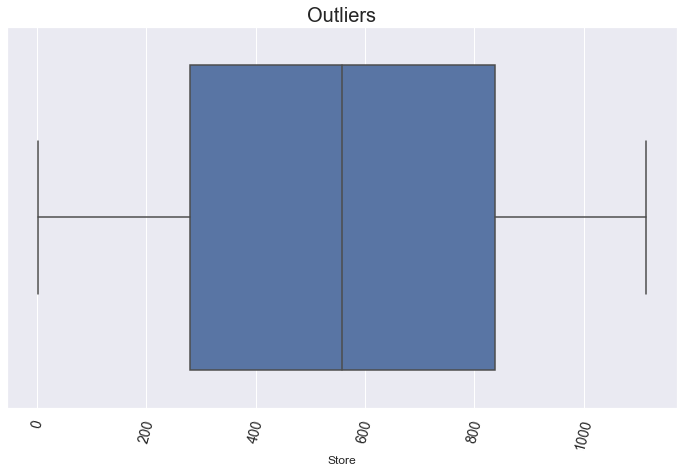

In [31]:
dataExplorer.plot_box(train_df, 'Store', 'Outliers')

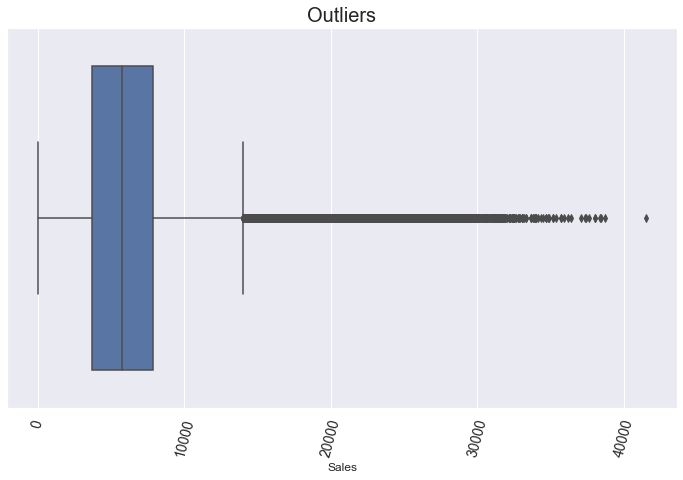

In [32]:
dataExplorer.plot_box(train_df, 'Sales', 'Outliers')

In [33]:
## Replace with median
cl_train_df.replace_outlier_with_median(train_df, 'Sales')

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,2015,7,31,5263.0,555,1,1,0,1
1,2,5,2015-07-31,2015,7,31,6064.0,625,1,1,0,1
2,3,5,2015-07-31,2015,7,31,8314.0,821,1,1,0,1
3,4,5,2015-07-31,2015,7,31,13995.0,1498,1,1,0,1
4,5,5,2015-07-31,2015,7,31,4822.0,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,2013,1,1,0.0,0,0,0,a,1
1017205,1112,2,2013-01-01,2013,1,1,0.0,0,0,0,a,1
1017206,1113,2,2013-01-01,2013,1,1,0.0,0,0,0,a,1
1017207,1114,2,2013-01-01,2013,1,1,0.0,0,0,0,a,1


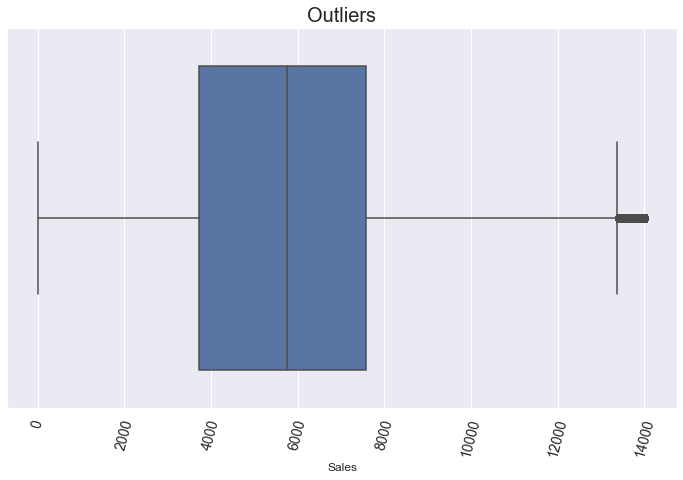

In [34]:
# look at fixed data
dataExplorer.plot_box(train_df, 'Sales', 'Outliers')

## Outliers detection and fixing for store data 

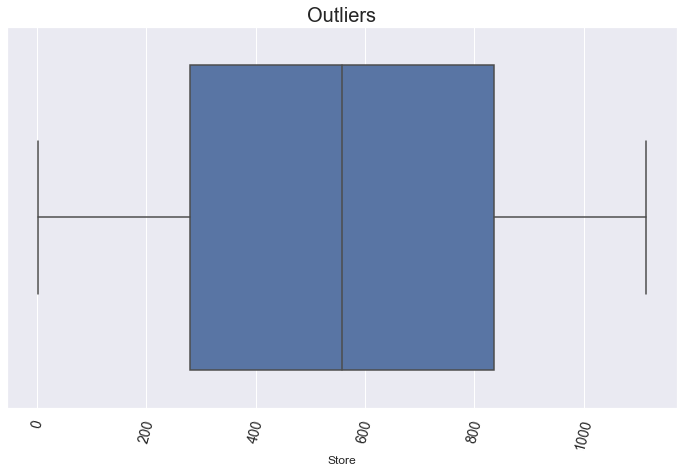

In [35]:
dataExplorer.plot_box(store_df, 'Store', 'Outliers')

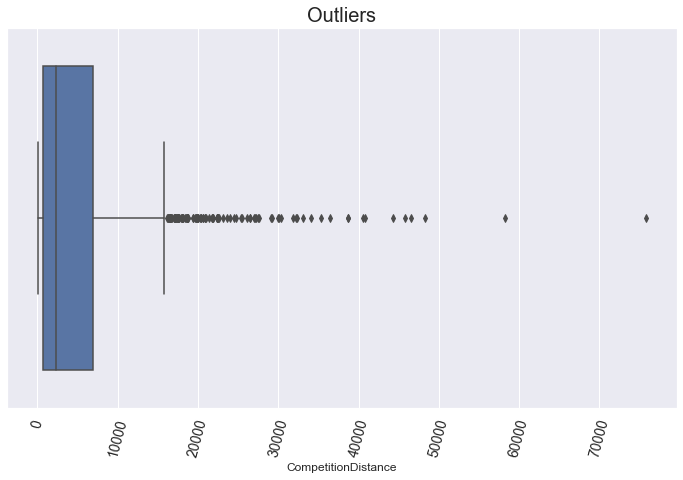

In [36]:
dataExplorer.plot_box(store_df, 'CompetitionDistance', 'Outliers')

In [37]:
# replace with median
cl_store_df.replace_outlier_with_median(store_df, 'CompetitionDistance')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,2325.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [38]:
## Save preprocessed data
# merge store with both test and train sets, on Store attribute
cl_trainStore = pd.merge(train_df, store_df, on='Store', how='inner')
cl_testStore = pd.merge(test_df, store_df, on='Store', how='inner')

In [41]:
#save
cl_trainStore.to_csv('../data/cl_trainStore.csv', index=False)
cl_testStore.to_csv('../data/cl_testStore.csv', index=False)

print('CLEAN DATA SAVED!')


CLEAN DATA SAVED!


<img src="../data/version0.jpg" alt="isolated" width="1000" height="250"/>